# Human Pose Estimation sec - 1.2

This is a Notebook coded on Local Runtime with the specs [core i5, 8GB RAM, 8GB Graphics, 250GB SSD]

* This notebook is used to:
      - Load Custom Created functions
      - Load and preprocess data using pre-defined pipelines
      - Predict outputs with pre-trained models
      - Visualize images, keypoints and various pose detections with openCv2 and matplotlib

In [2]:
#Import all necessary packages
import os, pandas as pd, numpy as np, cv2
import tensorflow.keras.models as m #To load prediction models
os.chdir('Custom_Functions')
from Metrics import coeff_determination #Metrics required to models with custom metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()                                                                       
%matplotlib inline
#Ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore') 

In [3]:
#Assigning path variables for train and test iamges for quick use later on
train_imgs = ('../Data/Pose_Dataset/train')  
test_imgs = ('../Data/Pose_Dataset/test')      
action_imgs = ('../Data/Action_Dataset/images')
#Loading train, test, and action joints datasets
train=pd.read_csv('../Data/Pose_Dataset/train_joints_coords.csv', header=None)
test=pd.read_csv('../Data/Pose_Dataset/test_joints_coords.csv', header=None)
actions=pd.read_csv('../Data/Action_Dataset/action_joints.csv')
actions.columns= list(range(actions.shape[1]))

In [4]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,train0.jpg,190,160,149,137,151,84,122,34,47,77,31,141,31,190
1,train1.jpg,192,137,148,122,138,77,109,40,47,79,36,140,34,184
2,train2.jpg,190,139,147,116,139,72,103,33,37,82,33,148,47,188
3,train3.jpg,185,157,145,134,141,82,114,41,38,85,32,149,76,184
4,train4.jpg,44,182,38,139,53,83,119,38,155,91,172,139,195,177


- From the above output, we can see that the dataset has 15 columns, first one being the image file names and rest 14 are the various join coordinates for pose estimation

## Visualizing the given datasets and images below

(-0.5, 223.5, 223.5, -0.5)

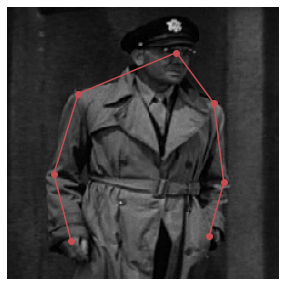

In [5]:
#Loading an Image from train data for visualization of the joints
img = cv2.imread(train_imgs + '/train100.jpg')

#Storing Respective Coordinates of img
cord=train.iloc[100,1:].values 

# Seperating 'x' and 'y' points in list named x,y respectively. 
x=[];y=[] 
for i in range(0, len(cord), 2):
    x.append(cord[i]) ;y.append(cord[i+1])  
#Plotting using Matplotlib
plt.figure(figsize= (5,5)) 
plt.imshow(img);plt.plot(x,y, 'ro-');plt.grid(False);plt.axis(False)
#r=colour, o=joint from coordinates -=connecting line

Text(0.5, 1.0, 'Hello')

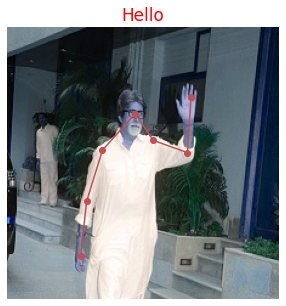

In [6]:
#Loading an Image from action dataset for visualization
img = cv2.imread(action_imgs + '/hello_test.jpg')

#Storing Respective Coordinates
cord=actions.iloc[20,1:-1].values 

#x and y points in list named x,y respectively 
x=[];y=[] 
for i in range(0,len(cord), 2): 
  x.append(cord[i]) ;y.append(cord[i+1])  

plt.figure(figsize= (5,5)) 
plt.imshow(img);plt.plot(x,y, 'ro-');plt.grid(False);plt.axis(False)
plt.title(actions.iloc[0,-1], color= 'red', size=17) 

## Load the keypoints prediction model to verify accuracy visually

# Model  Architecture

### ![alt text](https://miro.medium.com/max/940/1*3-TqqkRQ4rWLOMX-gvkYwA.png) 

In [7]:
model_path=('../Custom_Models/Keras_Model_H5')
prediction_model=m.load_model(model_path + '/final_model.h5', custom_objects={'coeff_determination': coeff_determination})
classification_model=m.load_model(model_path + '/final_classification_model.h5')

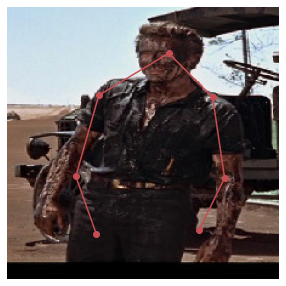

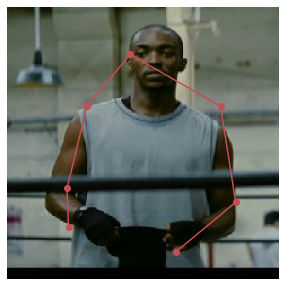

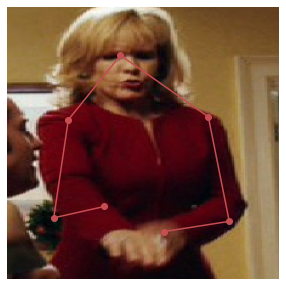

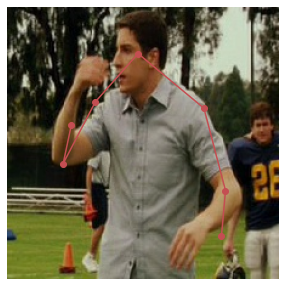

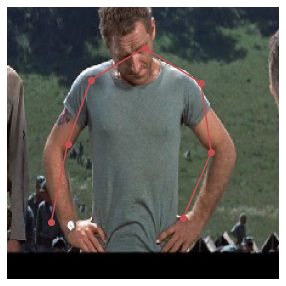

In [10]:
for i in range(5):
    random_n = np.random.randint(low=1, high= len(test))  #Taking Random Number to pick an Image
    img = cv2.imread(test_imgs + f'/test{random_n}.jpg') 
    #Storing the Prediction
    cord=prediction_model.predict(img.reshape(-1,224,224,3))[0]
    #Sperating x and y coordinates that has been predicted from the model
    x=[];y=[] 
    for i in range(0,len(cord), 2): 
        x.append(cord[i]) ;y.append(cord[i+1])  
    #using Matplotlib to infer what is the level of model understanding
    plt.figure(figsize= (5,5)) 
    plt.imshow(img);  
    plt.plot(x ,y , 'ro-');  
    plt.grid(False);plt.axis(False) 

## Results show that are model is pretty good at predicting the keypoints and joints

### Now try to combine the joint prediction  model and classification model and predict through video frames

''

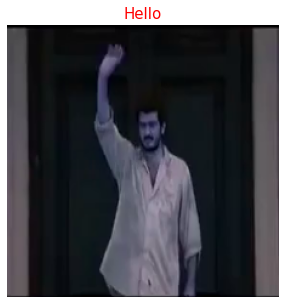

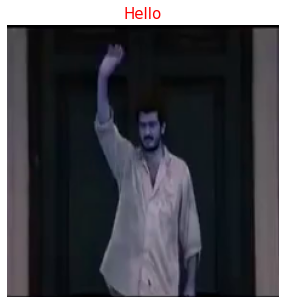

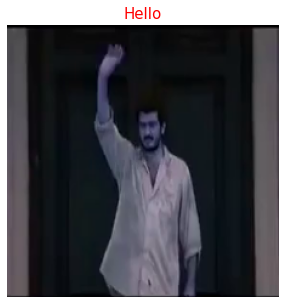

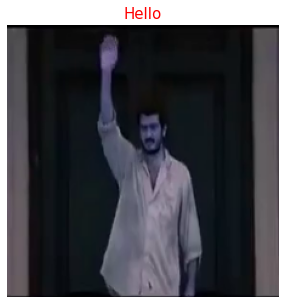

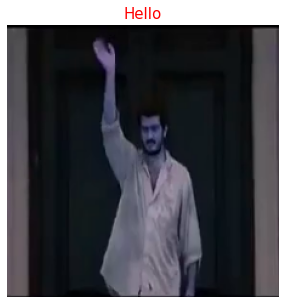

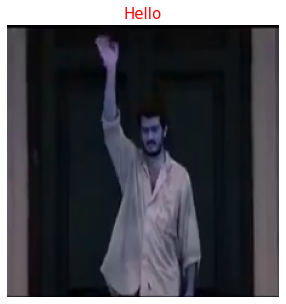

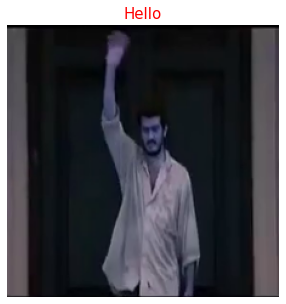

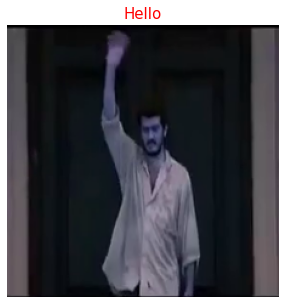

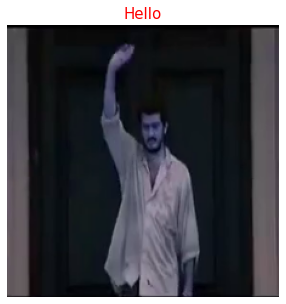

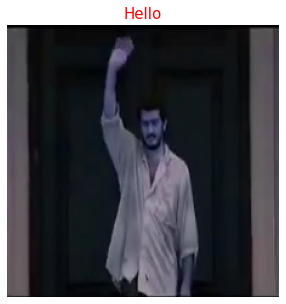

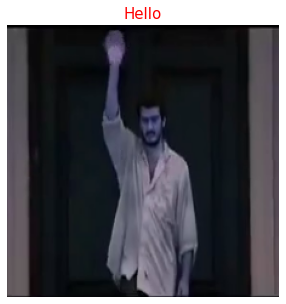

In [13]:
#Capturing from Video File
cap = cv2.VideoCapture('../Data/Action_Dataset/Waving.mp4')
# Get the frames per second
fps = cap.get(cv2.CAP_PROP_FPS) 
# Get the total numer of frames to be counted in the video.
frame_number = 0
frame_count = fps*10  #I am taking first 11 frames i.e for 0 to fps*10 with intervals of  fps
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number) # optional
#Setting the Target Size of frame that is to be captured
size = (224,224)
# Check if camera/VideoFile opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
# Read until video is completed
while cap.isOpened() and (frame_number <= frame_count):
    frame_number += fps
    ret, frame = cap.read()
    frame = cv2.resize(frame, size)
    if ret == True:
            #Using pose_model to predict joints cordinates
#             cords=pose_model.predict(frame.reshape(-1,224,224,3))[0]
            cords=prediction_model.predict(frame.reshape(-1,224,224,3))[0]

            #Next to it Using clf_model to predicting labels Namste/Hello
            cords=cords.reshape((-1,14))
            action=classification_model.predict_classes(cords)
            
            if action==0:
                action = 'Hello'
            else:
                action = 'Namaste'     
            
            #using Matplotlib to infer what is the level of model understanding
            plt.figure(figsize= (5,5)) 
            plt.imshow(frame); 
            
            plt.title(action, size= 15, color= 'red')
            plt.grid(False);plt.axis(False)
;

# <font color='green'> END of Sec 1.2 || Sec 1.3 and Sec 1.4 will be updated soon|</font>
    
   * Sec 1.3 -> Create a url link from jupyter notebook, through which an image can be uploaded, and results of hosted model's live predictions can be viewed.
   * Sec 1.4 -> Prediciton from webcam on local runtime.
   * Sec 1.4.1 -> Remote live predictions by clicking a link and allowing webcam access.

# Further Scope

* Although proejcts like Human Pose Detection have become quite common in the industry, the scope of these models are underestimated.

* If trained further many products and services could pour to life from this point.
* Examples of future scope include, crime detection like physical assualts, abuse, bullying and robbing.
* More complex examples include, Xray imaging, BMI calculation, etc..